Robust MPC: Simulation with linearized rocket system

In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

# Require ipympl
%matplotlib widget 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
A =
 [[1.   0.  ]
 [0.05 1.  ]]
B =
 [[0.00865235]
 [0.00021631]]
K_lqr =
 [[20.39369744 28.80585866]]
K =
 [[-20.39369744 -28.80585866]]
P =
 [[1274.23382763 1829.11834887]
 [1829.11834887 7079.70475038]]
A_cl =
 [[ 0.82354653 -0.24923846]
 [ 0.04558866  0.99376904]]
eig(A_cl) = [0.90865779+0.06417572j 0.90865779-0.06417572j]
max |eig(A_cl)| = 0.9109212333425355
Minimal robust invariant set computation converged after 40 ite

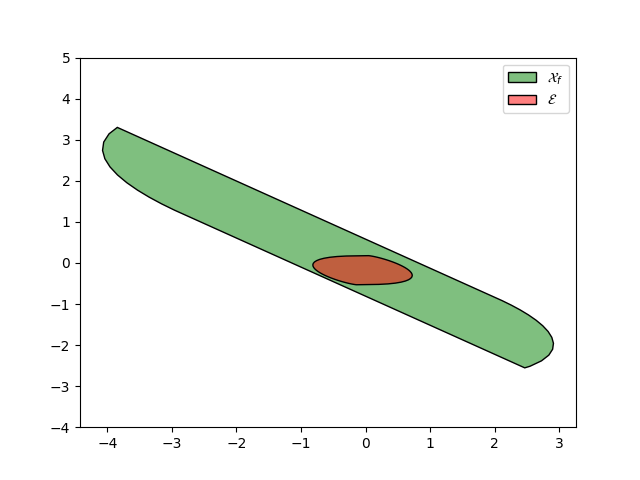

In [2]:
import numpy as np

from LandMPC.MPCControl_z import MPCControl_z
from src.rocket import Rocket
from src.pos_rocket_vis import *

Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7  # Do not change!!!

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

sim_time = 10.0

x0 = np.zeros(12, dtype=float)
x0[11] = 10.0  
x0[8]  = 0.0   

x_ref = np.array([0.]*9 + [1., 0., 3.], dtype=float)
xs, us = rocket.trim(x_ref)

print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

sys_lin = rocket.linearize_sys(xs, us)
A, B = sys_lin.A, sys_lin.B

H = 6.0
mpc = MPCControl_z(A, B, xs, us, Ts, H)


In [3]:
print("\n====== Tightened input constraint U~ (for nominal delta input v) ======")
print("U~ vertices (delta):", [mpc.u_tilde_min, mpc.u_tilde_max])

print("\n====== Corresponding absolute nominal throttle interval ======")
print("Pavg_nom in [", mpc.pavg_nom_min, ",", mpc.pavg_nom_max, "]")

print("\n(Reference) trim us[2] =", float(us[2]))
print("(Reference) physical Pavg bounds = [40, 80]")


====== Tightened input constraint U~ (for nominal delta input v) ======
U~ vertices (delta): [-7.224715248420777, 1.7762090466913492]

====== Corresponding absolute nominal throttle interval ======
Pavg_nom in [ 49.441951422738974 , 58.4428757178511 ]

(Reference) trim us[2] = 56.66666667115975
(Reference) physical Pavg bounds = [40, 80]


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

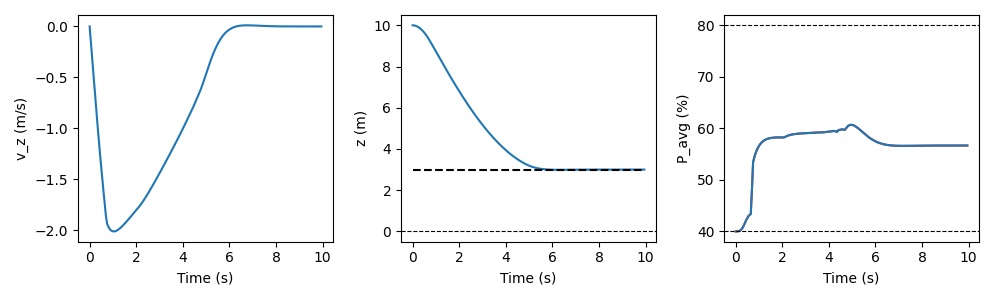

In [4]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='no_noise')
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, xs, 'sys_z')

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

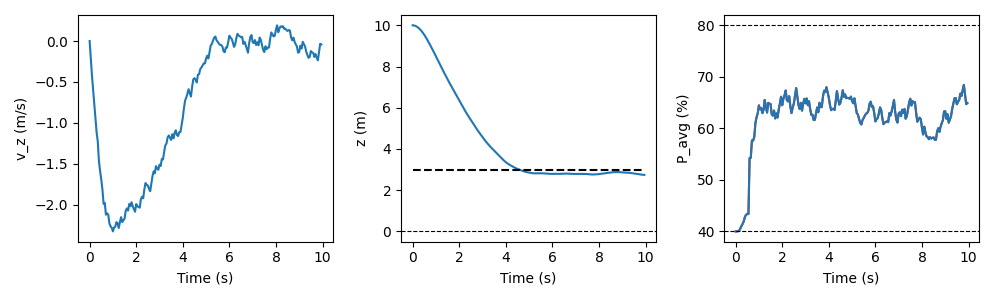

In [5]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='random')
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, xs, 'sys_z')

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

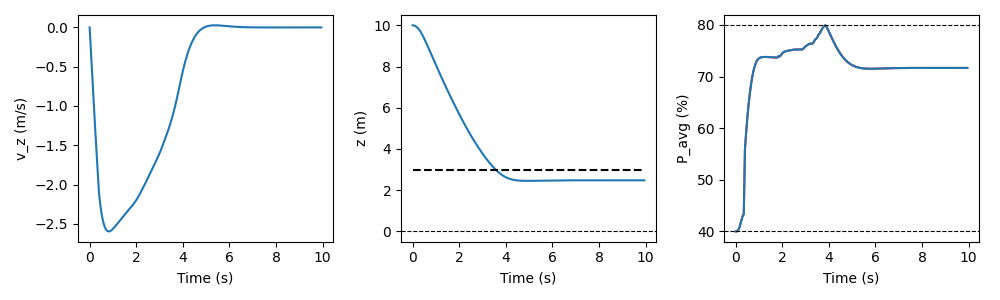

In [6]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='extreme')
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, xs, 'sys_z')
